In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

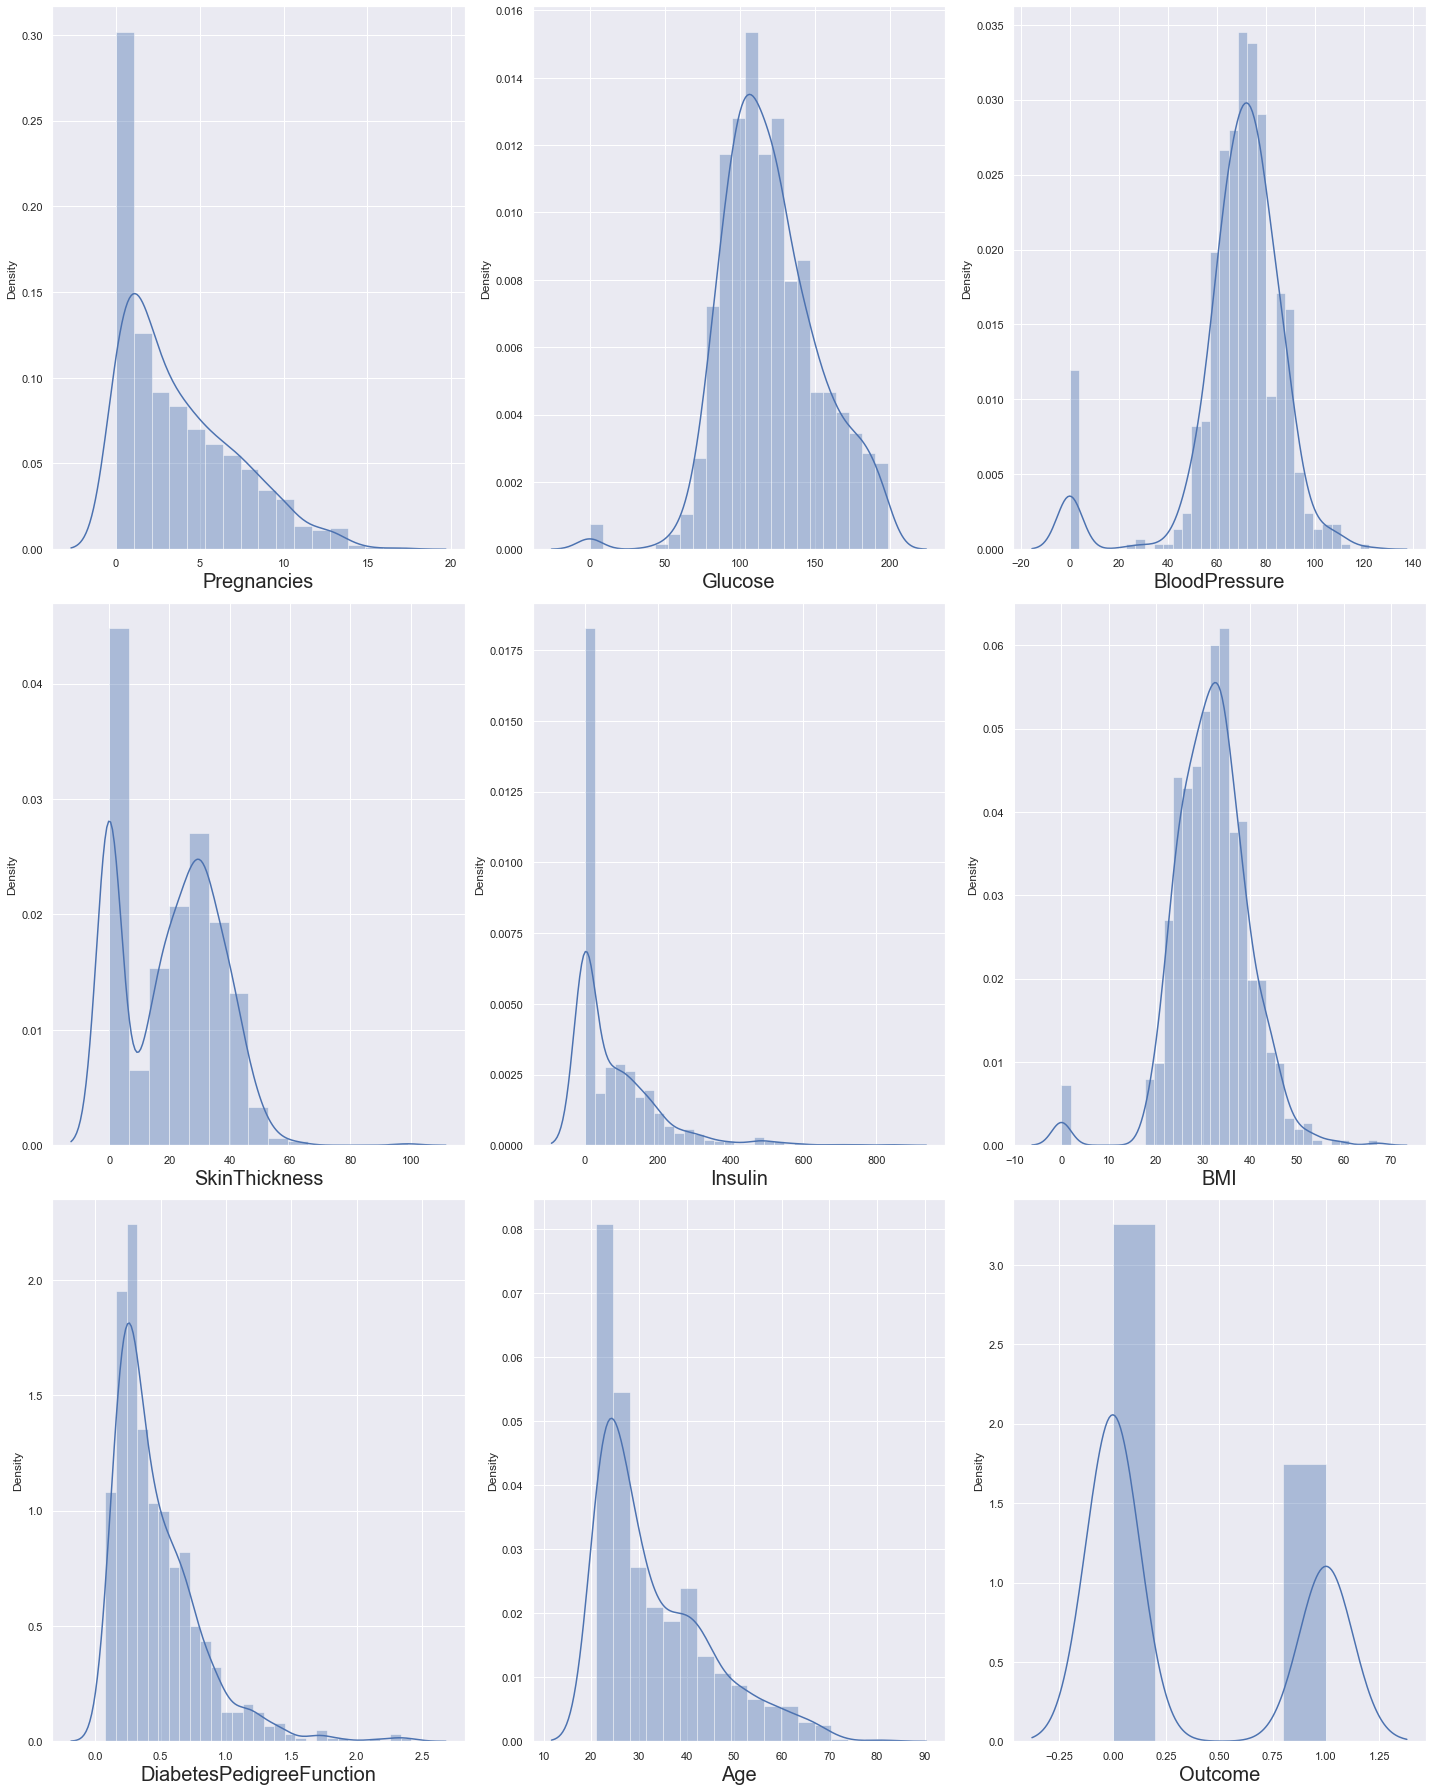

In [10]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for col in df:
    if plotnumber<=28:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 20)
    plotnumber+=1
plt.tight_layout()

In [18]:
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())

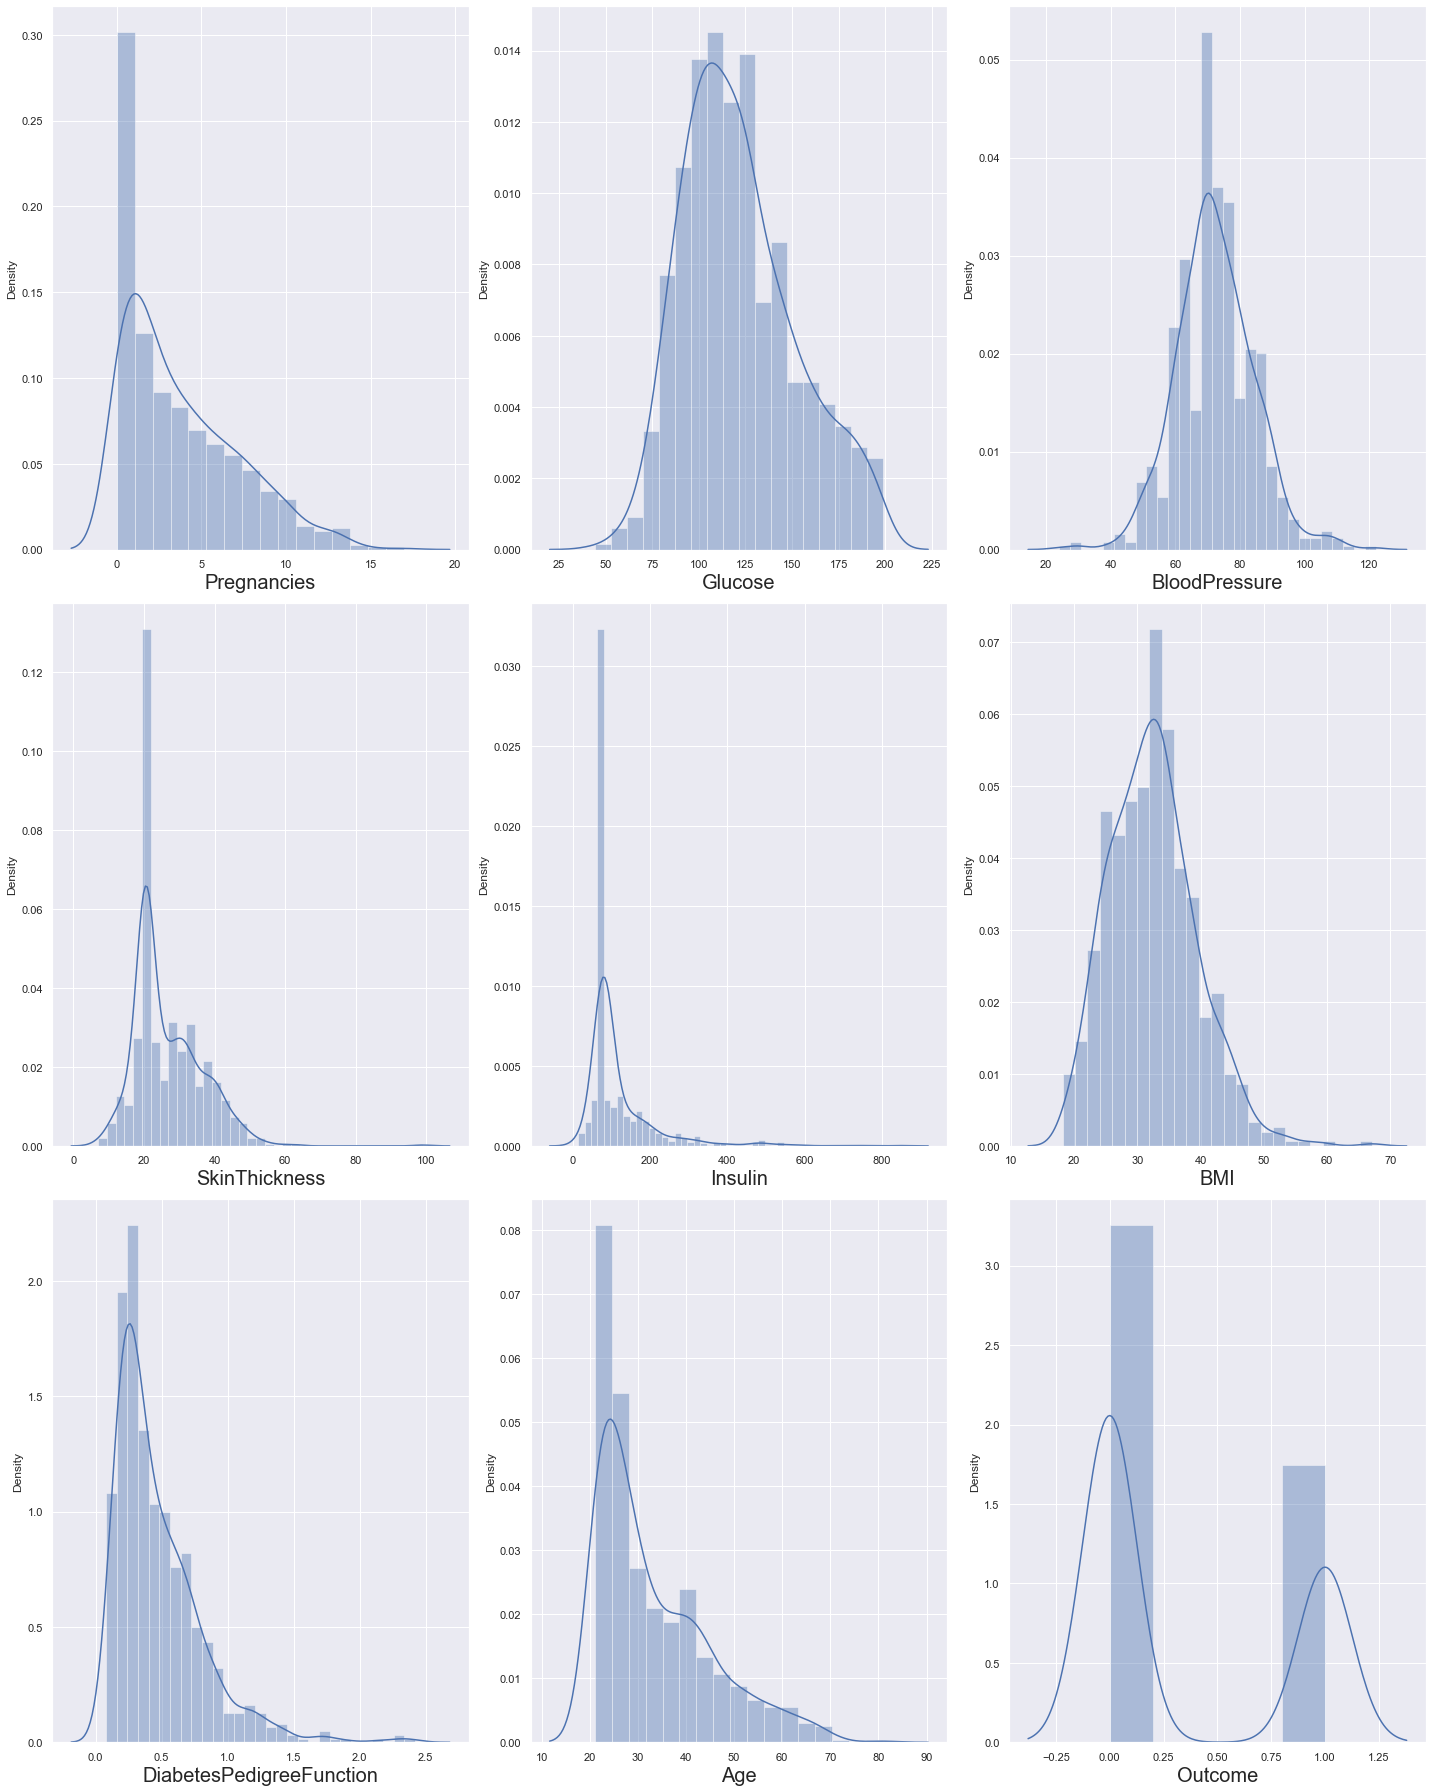

In [19]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for x in df:
    if plotnumber<=30:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[x])
        plt.xlabel(x, fontsize = 20)
    plotnumber+=1
plt.tight_layout()

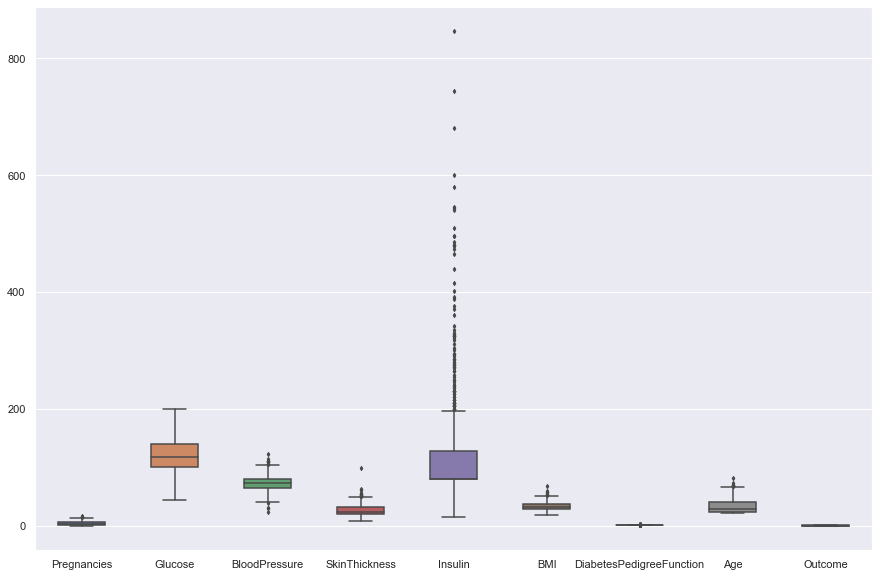

In [25]:
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data=df, ax=ax, width=0.5, fliersize=3)
plt.show()

In [48]:
q = df['Pregnancies'].quantile(0.98)
# we are removing the top 2% df from the Pregnancies column
df_cleaned = df[df['Pregnancies']<q]
q = df_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% df from the BMI column
df_cleaned  = df_cleaned[df_cleaned['BMI']<q]
q = df_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% df from the SkinThickness column
df_cleaned  = df_cleaned[df_cleaned['SkinThickness']<q]
q = df_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% df from the Insulin column
df_cleaned  = df_cleaned[df_cleaned['Insulin']<q]
q = df_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% df from the DiabetesPedigreeFunction column
df_cleaned  = df_cleaned[df_cleaned['DiabetesPedigreeFunction']<q]
q = df_cleaned['Age'].quantile(0.99)
# we are removing the top 1% df from the Age column
df_cleaned  = df_cleaned[df_cleaned['Age']<q]

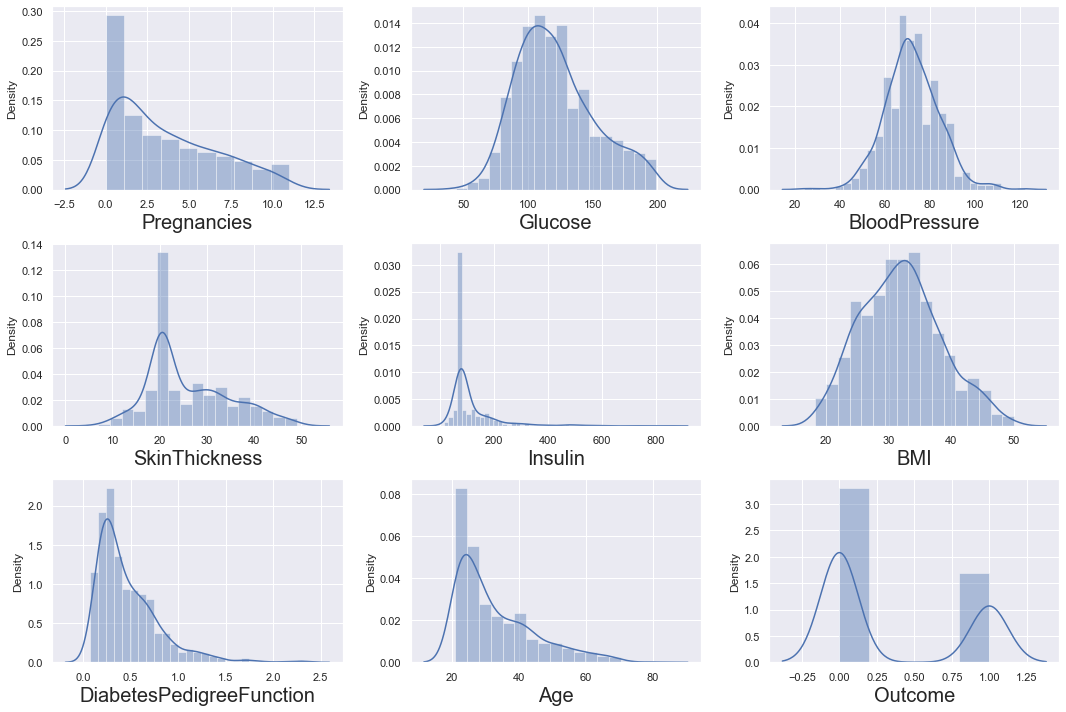

In [50]:
plt.figure(figsize=(15,10), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=30:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [52]:
y = df['Outcome']

In [54]:
X = df.drop(columns='Outcome')

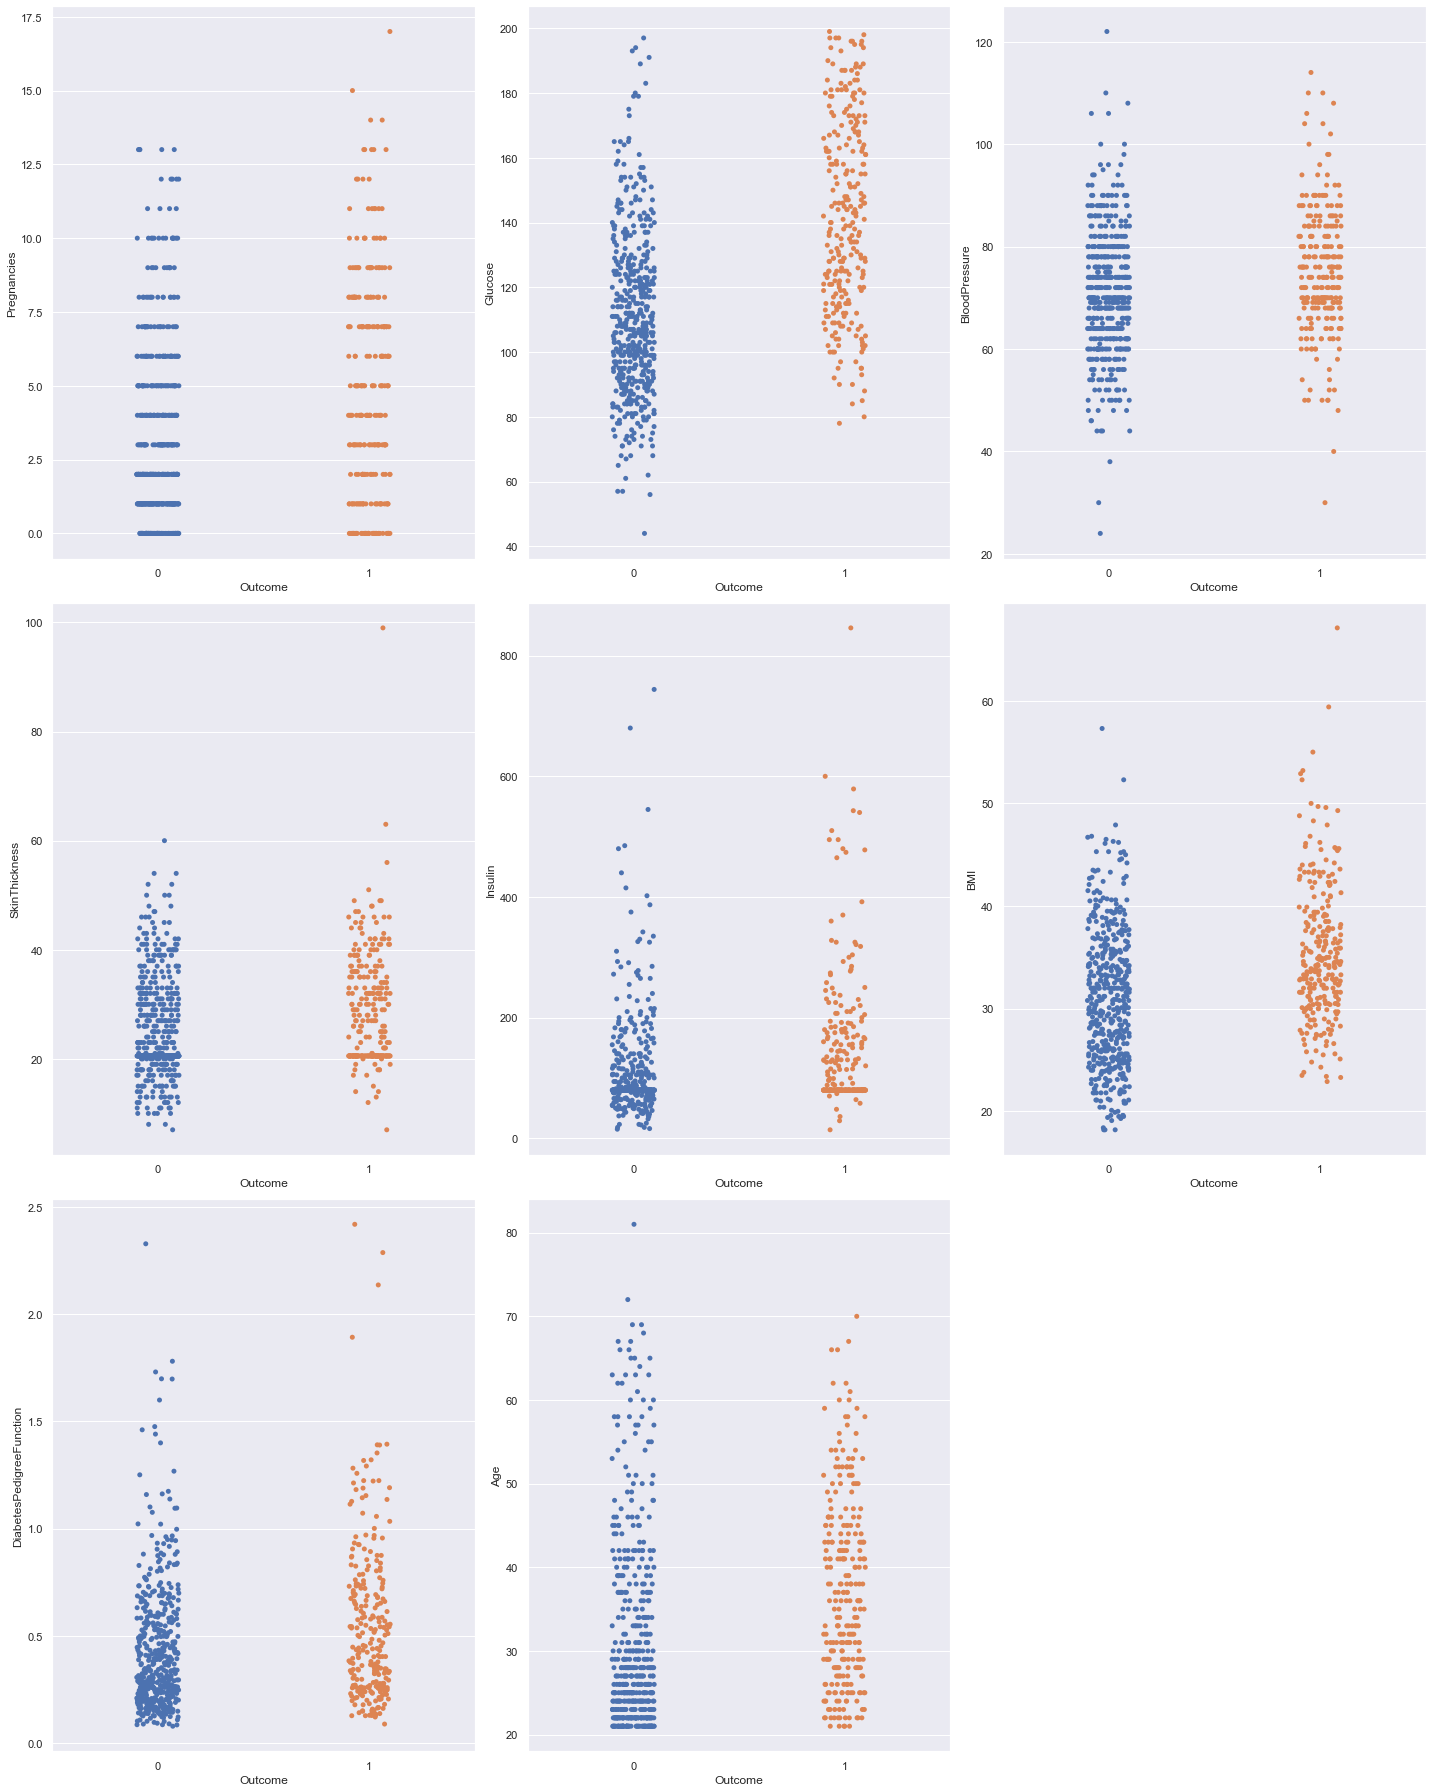

In [55]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
vif = pd.DataFrame()

In [58]:
vif

""


In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

In [62]:
vif['Features'] = X.columns

In [63]:
vif

,VIF,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25,random_state=355)

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
log_reg_model = LogisticRegression()

In [67]:
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [68]:
import pickle

In [69]:
pickle.dump(log_reg_model, open("my_logistic_model_13.pickel", 'wb'))

In [70]:
with open("model_13_for_prediction.sav", 'wb') as f:
    pickle.dump(log_reg_model, f)

In [71]:
with open("mysdandaredscaler_13.sav", 'wb') as f:
    pickle.dump(scaler, f)

In [72]:
y_pred = log_reg_model.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [86]:
accuracy_score(y_test, y_pred)

0.7552083333333334

In [87]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [88]:
confusion_matrix

array([[110,  15],
       [ 32,  35]], dtype=int64)

In [89]:
#true_positive = conf_mat[0][0]
#false_positive = conf_mat[0][1]
#false_negative = conf_mat[1][0]
#true_negative = conf_mat[1][1]

In [90]:
from sklearn.metrics import roc_auc_score, roc_curve

In [93]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7011940298507463

In [95]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

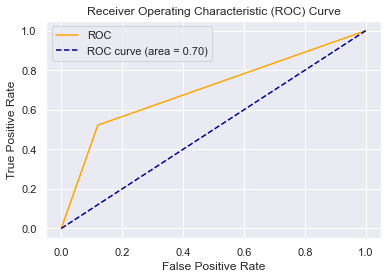

In [102]:
plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
plt.plot([0,1], [0,1],  color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

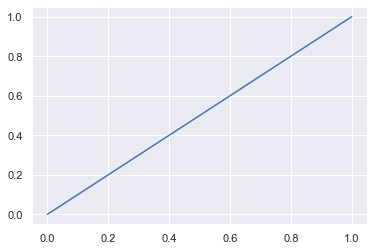

In [103]:
plt.plot([0,1], [0,1])